In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import numpy as np
import pandas as pd

In [29]:
data = pd.read_csv('/content/drive/MyDrive/Restaurant_Reviews.tsv', delimiter='\t', quoting=1)

In [30]:
data.shape

(1000, 2)

In [31]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [32]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [33]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [34]:
import nltk # natural language toolkit is a package from NLP
import re # Regular expressions
nltk.download('stopwords') # NLTK
from nltk.corpus import stopwords # a stop word is commonly used word that search engine is programmed to ignore
from nltk.stem.porter import PorterStemmer # mainly focuses on Data Mining and information retrieval .... it is used to remove the suffixes from an English word and obtain its stem

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
corpus = []
for i in range(0,1000):
  review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=data['Review'][i]) # removes and replaces every non 'a-z' and 'A-Z' with ' '.
  review = review.lower() # to lower case
  review_words = review.split() # tokenizing review by words
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))] # every non-stopword is added to the list ( i.e stopwords such as 'the', 'this' etc are omitted).
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]
  review = ' '.join(review)
  corpus.append(review)

In [36]:
len(corpus)

1000

In [37]:
from sklearn.feature_extraction.text import CountVectorizer # cv is used to convert text to numerical data
cv = CountVectorizer(max_features=1500) # initialize cv to 1500(data size from corpus)
# in below fit_transform fits the vectorizer to the corpus (learns the vocabulary and tokenizes the documents) and then transforms the documents into a document-term matrix (DTM) which is then converted to an array.
# the DTM formed where each row represents a document, and each column represents a word from the vocabulary
X = cv.fit_transform(corpus).toarray() # corpus is converted into numerical data as an array format
Y = data.iloc[:, 1].values # extracting the likes(boolean) from data(origianl set tsv)


In [38]:
# here splitting data is done into two parts (training and testing) so that to train the model to training dataset and test its accuracy on unseen test data
from sklearn.model_selection import train_test_split # uses to split original data into training data & test data
X_train, X_test, Y_train, Y_test, = train_test_split(X,Y,test_size=0.20,random_state =0) # test_size for splitting purpose and random state simply sets seed to the random generator so that train-test splits are always deterministic if not it will be different each time

# 80% - training dataset
# 20% - testing dataset

In [39]:
X_train.shape , X_test.shape, Y_train.shape, Y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [40]:
# PREPROCESSING PART ENDS---
# MODEL TRAING----
# Multinomial Naive bayes - the algorithm is a probabilistic learning method that is mostly used in NLP. Its based on Bayes theorem and predicts tag of text such as piece of email or newpaper article

In [41]:
# fitting Naive bayes to the training set
from sklearn.naive_bayes import MultinomialNB
# MNB is suitable for the classification purpose with discrete features( word counts for text classification)

classifier = MultinomialNB()
classifier.fit(X_train, Y_train) # fitting training data

MultinomialNB()

In [42]:
# Predicting test set results
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [43]:
# for accuracy , precision and recall
from sklearn.metrics import accuracy_score # it calculates the accuracy score for a set of predictedd values against true labels.

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score_acc = accuracy_score(Y_test, Y_pred)
score_pre = precision_score(Y_test, Y_pred)
score_rec = recall_score(Y_test, Y_pred)

print("---Scores---")
print("Accuracy Score : {}% ".format(round(score_acc*100,2)))
print("Precision Score : {}% ".format(round(score_pre*100,2)))
print("Recall Score : {}% ".format(round(score_rec*100,2)))

---Scores---
Accuracy Score : 76.5% 
Precision Score : 76.42% 
Recall Score : 78.64% 


In [44]:
# Making the Confusion Matrix
# A Confusion Matrix is a table that is used to define the performance of a classification algorithm. A Confusion Matrix visualizes and summarizes the performance of a classification

from sklearn.metrics import confusion_matrix
# (test , predicted)
cm = confusion_matrix(Y_test, Y_pred)
# cm -> array -> [[true +ve, false +ve] , [false -ve, true -ve]

In [45]:
cm

array([[72, 25],
       [22, 81]])

Text(95.72222222222221, 0.5, 'Actual Values')

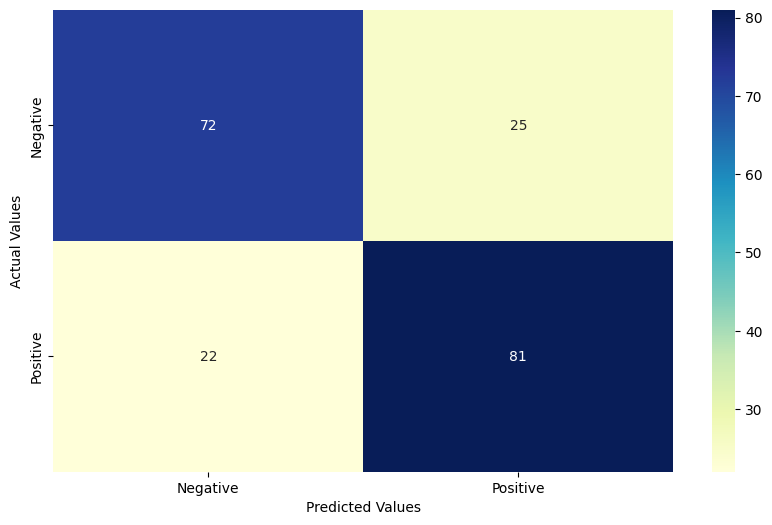

In [46]:
from ast import increment_lineno
# plotting confusion matrix

import matplotlib.pyplot as plt # a low level graph plotting library for visualizing purpose
import seaborn as sns # a visualizing library based on matplotlib
%matplotlib inline

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap= 'YlGnBu' , xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [47]:
# Hyperparameter tuning the Naive Bayes Classifier -> to enhance the accuracy
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train,Y_train)
  temp_Y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(Y_test,temp_Y_pred)
  print("Accuracy Score for alpha={} is : {}%".format(round(i,1), round(score*100,2)))
  if score > best_accuracy:
    best_accuracy = score
    alpha_val = i
print('------------')
print('The Best Accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100,2),round(alpha_val,1)))

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Accuracy Score for alpha=0.0 is : 76.5%
Accuracy Score for alpha=0.1 is : 78.0%
Accuracy Score for alpha=0.2 is : 78.5%
Accuracy Score for alpha=0.3 is : 78.0%
Accuracy Score for alpha=0.4 is : 78.0%
Accuracy Score for alpha=0.5 is : 77.5%
Accuracy Score for alpha=0.6 is : 77.5%
Accuracy Score for alpha=0.7 is : 77.5%
Accuracy Score for alpha=0.8 is : 77.0%
Accuracy Score for alpha=0.9 is : 76.5%
Accuracy Score for alpha=1.0 is : 76.5%
------------
The Best Accuracy is 78.5% with alpha value as 0.2


In [48]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, Y_train)

MultinomialNB(alpha=0.2)

In [49]:
# PREDICTIONS

def predict_review(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [50]:
sample_review = "My recent visit to the restaurant left me thoroughly disappointed. The confusing menu, filled with obscure descriptions, made ordering a daunting task. The lackluster food, served tepid and tasteless, only added to my dismay. The inattentive staff's incompetence further marred the experience, leaving me eager to leave."
if predict_review(sample_review):
  print('Positive review')
else:
  print('Negative review')

Negative review


In [51]:
sample_review = "My recent dining experience at the restaurant was nothing short of extraordinary. From the moment I stepped inside, I was enveloped in an ambiance that exuded warmth and sophistication. The menu, a symphony of culinary creativity, featured a diverse array of dishes that promised an exciting gastronomic journey.Each plate that graced our table was a masterpiece of flavor and presentation. The chef's meticulous attention to detail was evident in every bite, as fresh, locally sourced ingredients melded harmoniously to create a symphony of tastes. Whether it was the perfectly seared steak, the delicate seafood, or the vibrant vegetarian options, each dish was a testament to the chef's culinary prowess.The service was impeccable, with an attentive and knowledgeable staff that enhanced our dining experience. They guided us through the menu, offering thoughtful recommendations and ensuring our glasses were never empty.In conclusion, my visit to this restaurant was an exquisite culinary adventure. It exceeded all expectations, leaving me with memories of a remarkable dining experience I will treasure. I wholeheartedly recommend this establishment to anyone seeking an unforgettable gastronomic journey."
if predict_review(sample_review):
  print('Positive review')
else:
  print('Negative review')

Positive review
